C:\Users\ACER\AppData\Local\Temp\ipykernel_10972\3563986982.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


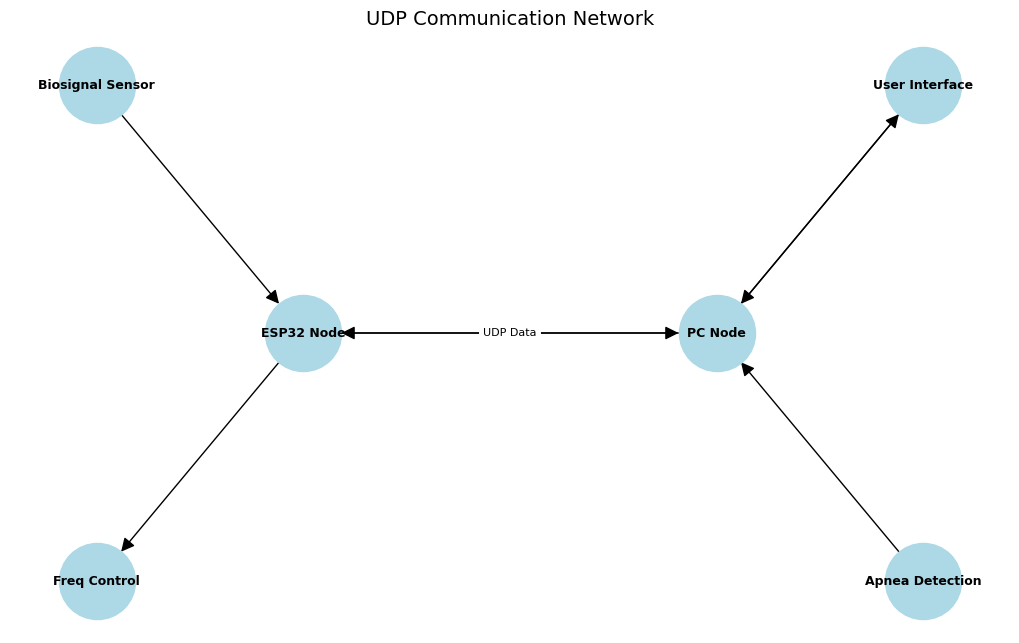

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo dirigido
G = nx.DiGraph()

# Nodos principales (ESP32 y PC)
G.add_node("ESP32 Node", layer='main')
G.add_node("PC Node", layer='main')

# Subcomponentes de cada nodo
# Subcomponentes ESP32
G.add_node("Biosignal Sensor", layer='ESP32')
G.add_node("Freq Control", layer='ESP32')

# Subcomponentes PC
G.add_node("User Interface", layer='PC')
G.add_node("Apnea Detection", layer='PC')

# Conexiones internas dentro del nodo ESP32
G.add_edge("Biosignal Sensor", "ESP32 Node")
G.add_edge("ESP32 Node","Freq Control")  # Dirección invertida para el control de frecuencia

# Conexiones internas dentro del nodo PC
G.add_edge("User Interface", "PC Node")
G.add_edge("PC Node","User Interface",)
G.add_edge("Apnea Detection", "PC Node")

# Comunicación bidireccional entre nodos por UDP
G.add_edge("ESP32 Node", "PC Node", label="UDP Data")
G.add_edge("PC Node","ESP32 Node", label="UDP Data")
# Posiciones manuales para organización visual
pos = {
    "Biosignal Sensor": (-2, 1),
    "Freq Control": (-2, -1),
    "ESP32 Node": (-1, 0),
    "PC Node": (1, 0),
    "User Interface": (2, 1),
    "Apnea Detection": (2, -1)
}

# Etiquetas de las flechas UDP
edge_labels = nx.get_edge_attributes(G, 'label')

# Dibujar el grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=9, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("UDP Communication Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
